In [20]:
import random
import pandas as pd # data frame
import numpy as np # matrix math
import os # interation with the OS
from sklearn.utils import shuffle # shuffling of data
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib import colorbar
import matplotlib.pyplot as plt # to view graphs

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

def all_colors():
    return ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

def random_color():
    pallette = all_colors()
    return cc(random.choice(pallette))

def all_lines():
    return ["-", "--", "-.", "."]

def all_markers():
    return [".", ",", "o", "v", "^", "1", "8", "*", "H", "d"]

def random_marker():
    return random.choice(all_markers())

def random_rgb():
    return (random.random(), random.random(), random.random())

def plot_mfcc_colorbar(df, filename):
    # Plot MFCC Coefficients
    fig, ax = plt.subplots()
    mfcc_data= np.swapaxes(df_01, 0 ,1)
    cmap = cm.coolwarm
    norm = mcolors.Normalize(df.to_numpy().min(), df.to_numpy().max())
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
    ax.imshow(mfcc_data, interpolation='nearest', cmap=cmap, origin='lower')
    ax.set_title('MFCC Visualization')
    plt.ylabel(f"MFCC Coefficient")
    plt.xlabel(f"Quefrency (ms)")
    # plt.savefig(filename)
    plt.show()

def plot_mfcc_linear(df, coeffs):
    # Plot MFCC Coefficients as lines and analysis frame
    fig, ax = plt.subplots()
    for i in range(coeffs):
        plt.plot(df[i], color=random_color(), marker=random_marker(), markersize=4, label=f"MFCC {i+1}")
    ax.set_title('Analysis Frame vs. Coefficient Magnitude')
    ncols = 1 if (coeffs <= 5) else coeffs // 3
    plt.legend(ncol=ncols)
    plt.ylabel(f"Magnitude of MFCC")
    plt.xlabel(f"Quefrency (ms)")
    plt.show()

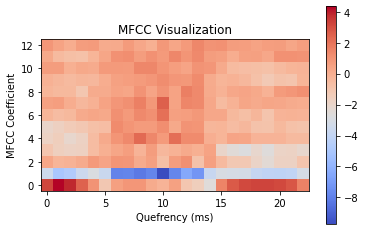

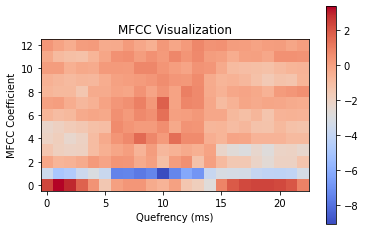

In [21]:
# Relative filepath names
INTERMEDIATE_PATH = '../../data/02_intermediate/single_person/test_00_female_'
file_00 = f"{INTERMEDIATE_PATH}00.txt"
file_01 = f"{INTERMEDIATE_PATH}01.txt"

# Load file data into dataframes
df_00 = pd.read_csv(file_00, delimiter=' ', header=None)
df_01 = pd.read_csv(file_01, delimiter=' ', header=None)

# Construct mfcc colorbar from dataframes
plot_mfcc_colorbar(df=df_00, filename=f"{INTERMEDIATE_PATH}colorbar_00.png")
plot_mfcc_colorbar(df=df_01, filename=f"{INTERMEDIATE_PATH}colorbar_01.png")

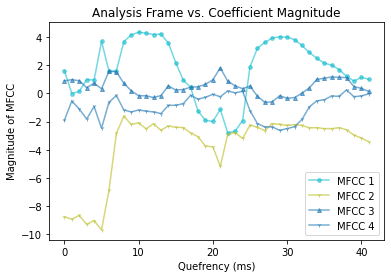

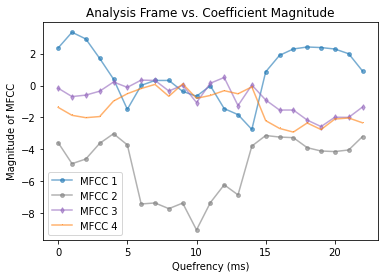

In [22]:
# Plot MFCC Coefficients as function of analysis window
COEFFS = 4
plot_mfcc_linear(df=df_00, coeffs=COEFFS)
plot_mfcc_linear(df=df_01, coeffs=COEFFS)